In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats

#### Importing the datasets

In [186]:
Data_of_Attack_Back = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back.csv')   
BufferOverflow = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_BufferOverflow.csv') 
FTPWrite = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_FTPWrite.csv',header = None ) 
GuessPassword = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_GuessPassword.csv') 
Neptune = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_Neptune.csv') 
NMap = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_NMap.csv') 
Normal = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_Normal.csv') 
PortSweep = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_PortSweep.csv') 
RootKit = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_RootKit.csv') 
Satan = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_Satan.csv') 
Smurf = pd.read_csv(r'C:\Users\user\Desktop\12. Capstone Case Study - Cyber Security Case Study\Data_of_Attack_Back_Smurf.csv') 

In [187]:
FTPWrite.columns = Data_of_Attack_Back.columns

In [188]:
FTPWrite.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0026,0,0.07,0,0.00116,0.00451,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.0,0,0,0,0
1,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.0,0,0,0,0


In [189]:
# creating a column attack 

Data_of_Attack_Back['attack'] = 'Back'
BufferOverflow['attack'] = 'BufferOverflow'
FTPWrite['attack'] = 'FTPWrite'
GuessPassword['attack'] = 'GuessPassword'
Neptune['attack'] = 'Neptune'
NMap['attack'] = 'NMap'
Normal['attack'] = 'Normal'
PortSweep['attack'] = 'PortSweep'
RootKit['attack'] = 'RootKit'
Satan['attack'] = 'Satan'
Smurf['attack'] = 'Smurf'

#### Appending the datasets

In [190]:
# Given datasets are having same columns name but different observations we just append all the datasets.

In [191]:
Data = pd.concat([Data_of_Attack_Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,Normal,PortSweep,RootKit,Satan,Smurf],axis=0)

In [192]:
Data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.001,0.1,0.0,0.10,0.0,0.0,0.0,0.0,0.0,Back
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.002,0.1,0.0,0.05,0.0,0.0,0.0,0.0,0.0,Back


#### Data Exploration and Data Preprocessing

In [193]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817551 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817551 non-null  float64
 1    protocol_type                817551 non-null  float64
 2    service                      817551 non-null  float64
 3    flag                         817551 non-null  float64
 4    src_bytes                    817551 non-null  float64
 5    dst_bytes                    817551 non-null  float64
 6    land                         817551 non-null  int64  
 7    wrong_fragment               817551 non-null  float64
 8    urgent                       817551 non-null  float64
 9    hot                          817551 non-null  float64
 10   num_failed_logins            817551 non-null  float64
 11   logged_in                    817551 non-null  float64
 12   num_compromised              817551 non-null  floa

In [194]:
Data.isna().sum().sum()

0

In [195]:
Data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [196]:
# Rename the columns as there are space in the column names

Data.columns = [column.replace(' ','') for column in Data.columns]

In [197]:
Data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [198]:
Data[Data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack


In [199]:
Data.attack.value_counts()

attack
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
BufferOverflow        30
RootKit               10
FTPWrite               8
Name: count, dtype: int64

#### Resampling

In [200]:
# Seperate the datasets into groups based on their attacks

sample = Data.groupby('attack', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [201]:
sample.shape

(490530, 42)

In [202]:
sample['attack'].value_counts()

attack
Normal            346026
Neptune           136337
Satan               3011
Smurf               1804
PortSweep           1778
NMap                 932
Back                 581
GuessPassword         32
BufferOverflow        18
RootKit                6
FTPWrite               5
Name: count, dtype: int64

In [203]:
# Missing Values

sample.isna().sum().sum()

0

In [204]:
# No missing values in the sample 

In [205]:
sample.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.0,4.905300e+05,490530.000000,490530.000000,...,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000,490530.000000
mean,0.000843,0.000569,0.052926,0.020159,0.004986,0.024785,0.0,6.115834e-07,0.000004,0.002446,...,0.166903,0.161606,0.066772,0.003382,0.006149,0.001682,0.024847,0.024838,0.005382,0.005287
std,0.025955,0.002593,0.096433,0.030959,0.033504,0.066348,0.0,4.283398e-04,0.000999,0.041488,...,0.102048,0.111628,0.043414,0.008549,0.017481,0.003692,0.043055,0.043144,0.021947,0.022090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003660,0.0,0.000000e+00,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019590,0.0,0.000000e+00,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.012000,0.002000,0.000000,0.000000
max,1.000000,0.020000,0.650000,0.100000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [206]:
# creating multinomial attack column 

multi = {'Normal': 0,
      'Neptune' : 1,
      'Satan' : 2,
      'Smurf' : 3,
      'PortSweep' : 4,
      'NMap' : 5,
      'Back' : 6,
      'GuessPassword' : 7,
      'BufferOverflow' : 8,
      'RootKit' : 9,
      'FTPWrite' : 10}

In [207]:
sample['Multi_Attack'] = sample['attack'].map(multi)

In [208]:
sample.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,Multi_Attack
742,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.000,0.0,0.001,0.001,0.003,0.003,Back,6
924,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.002,0.0,0.002,0.002,0.002,0.002,Back,6


In [209]:
# creating binomial attack column

bi = {1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,0:0}

In [210]:
sample['Binary_attack'] = sample['Multi_Attack'].map(bi)

In [211]:
sample['Binary_attack'].value_counts()

Binary_attack
0    346026
1    144504
Name: count, dtype: int64

In [212]:
Final_sample = sample.copy()

In [213]:
Final_sample.drop(['attack'], axis = 1, inplace = True)

In [214]:
Final_sample.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
742,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.000,0.0,0.001,0.001,0.003,0.003,6,1
924,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.002,0.0,0.002,0.002,0.002,0.002,6,1


In [215]:
Final_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490530 entries, 742 to 2791
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     490530 non-null  float64
 1   protocol_type                490530 non-null  float64
 2   service                      490530 non-null  float64
 3   flag                         490530 non-null  float64
 4   src_bytes                    490530 non-null  float64
 5   dst_bytes                    490530 non-null  float64
 6   land                         490530 non-null  int64  
 7   wrong_fragment               490530 non-null  float64
 8   urgent                       490530 non-null  float64
 9   hot                          490530 non-null  float64
 10  num_failed_logins            490530 non-null  float64
 11  logged_in                    490530 non-null  float64
 12  num_compromised              490530 non-null  float64
 13  root

In [216]:
Final_sample.isna().sum().sum()

0

# Segregating all the variables into Nominal variables, Binary variables and Numerical variables.

In [217]:
Nominal_var = ["protocol_type", "service", "flag"]

In [218]:
Binary_var = ["land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

In [219]:
Numerical_var = list(set(Final_sample.columns).difference(set(Nominal_var).union(set(Binary_var))).difference(['Binary_Attack','Multi_Attack']))

In [220]:
Numerical_var

['num_shells',
 'dst_host_srv_serror_rate',
 'num_outbound_cmds',
 'dst_host_srv_count',
 'dst_host_count',
 'num_root',
 'dst_host_serror_rate',
 'dst_bytes',
 'num_compromised',
 'urgent',
 'same_srv_rate',
 'wrong_fragment',
 'srv_count',
 'num_failed_logins',
 'diff_srv_rate',
 'src_bytes',
 'srv_error_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'Binary_attack',
 'srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'num_file_creations',
 'srv_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'serror_rate',
 'rerror_rate',
 'hot',
 'num_access_files',
 'dst_host_rerror_rate',
 'count',
 'duration']

In [221]:
Final_sample.Binary_attack.value_counts()

Binary_attack
0    346026
1    144504
Name: count, dtype: int64

In [222]:
# Data is imbalance

#### Handling imbalance data

In [223]:
# we can do Undersampling technique to balance the datasets 

major = Final_sample[Final_sample.Binary_attack == 0]
minor = Final_sample[Final_sample.Binary_attack == 1]

In [224]:
major_undersample = major.sample(replace = False, n = 144504, random_state = 123)

In [225]:
Balanced_sample = pd.concat([major_undersample, minor])

In [226]:
Balanced_sample.Binary_attack.value_counts()

Binary_attack
0    144504
1    144504
Name: count, dtype: int64

In [227]:
Balanced_sample.shape

(289008, 43)

#### Handling Outliers

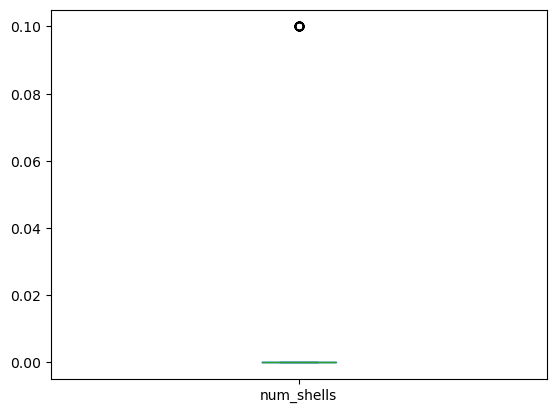

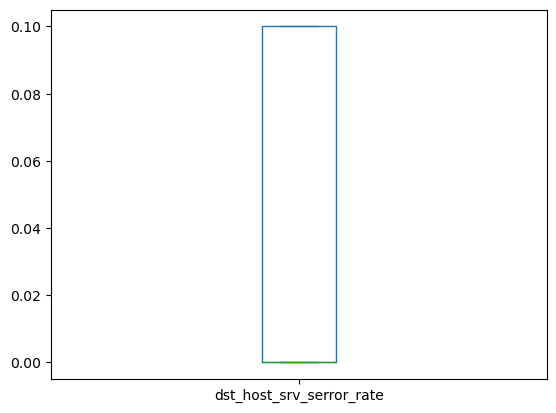

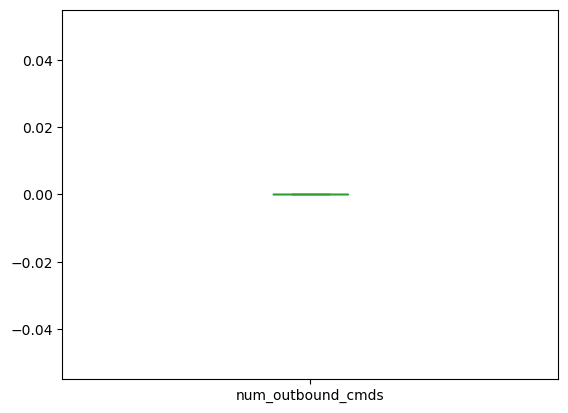

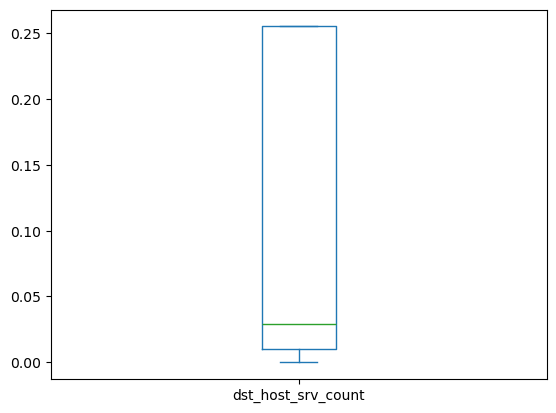

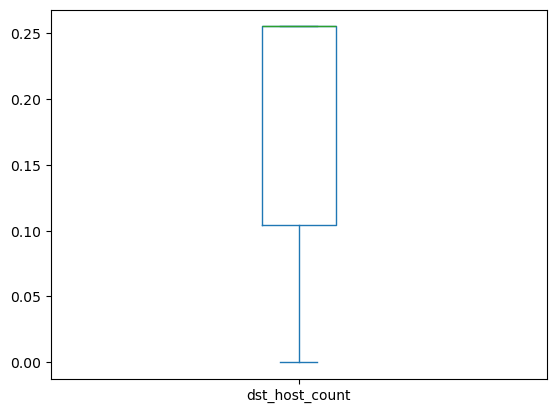

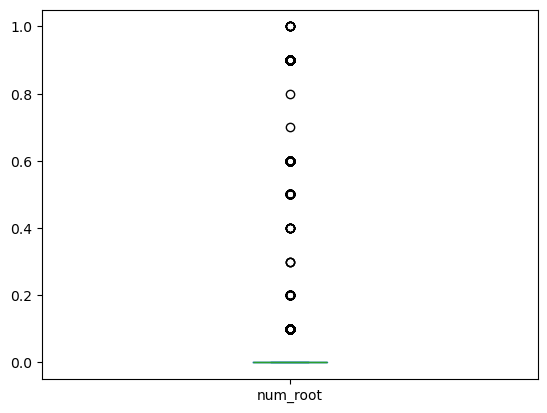

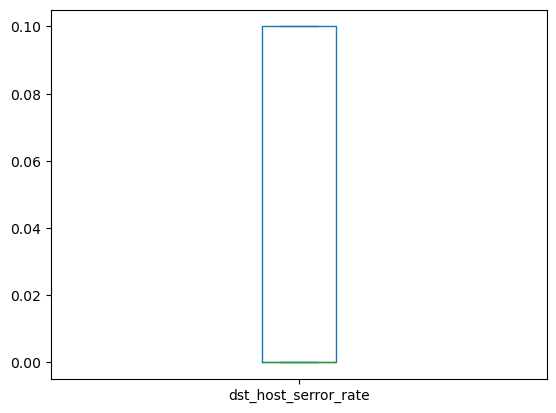

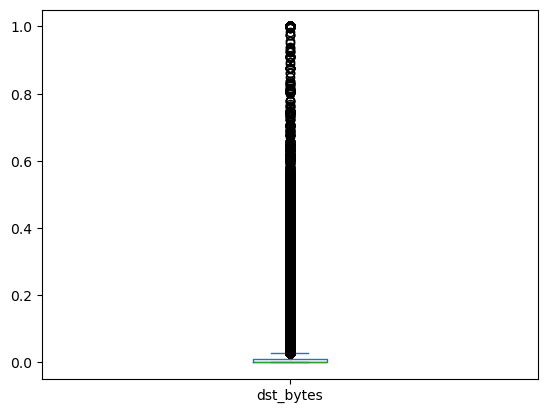

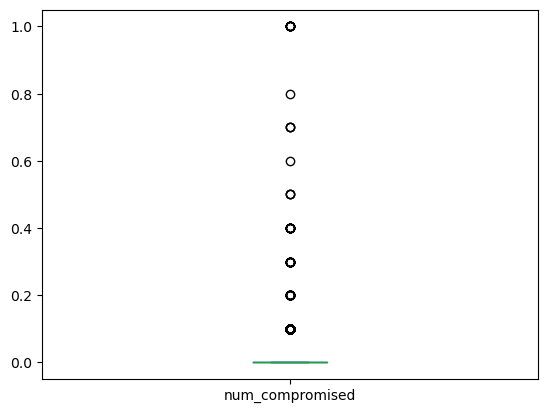

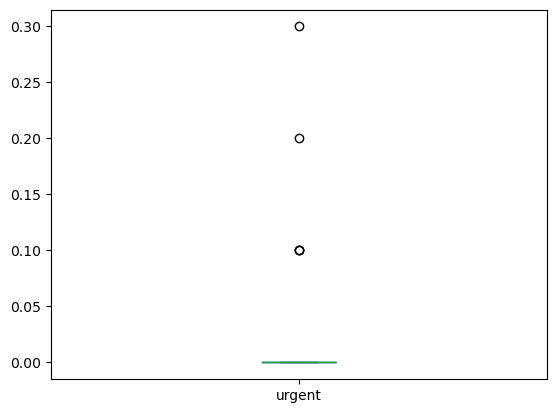

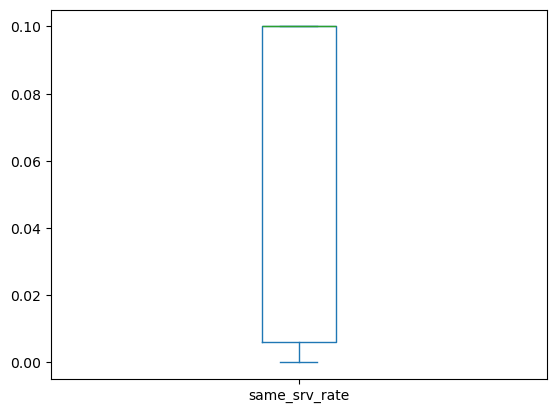

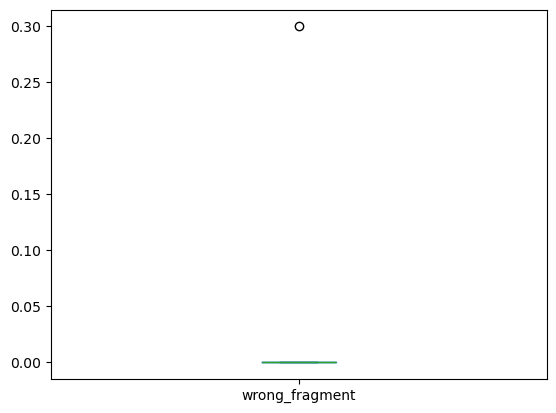

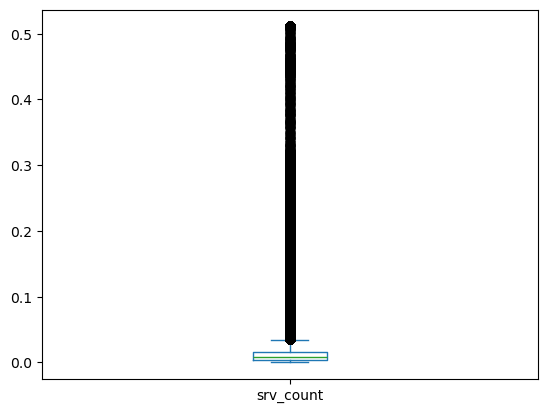

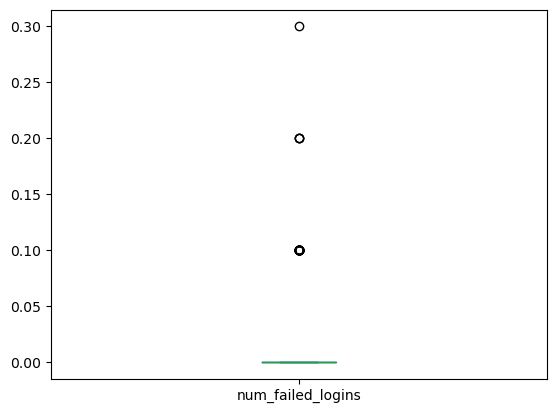

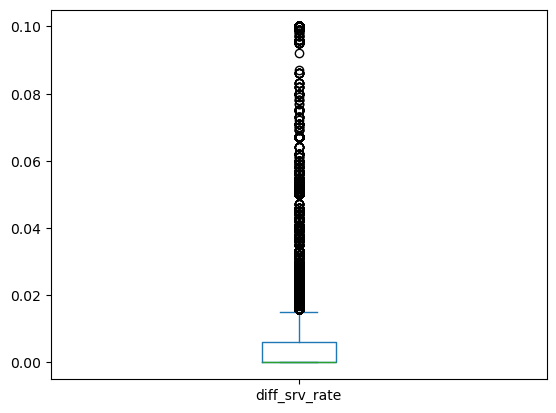

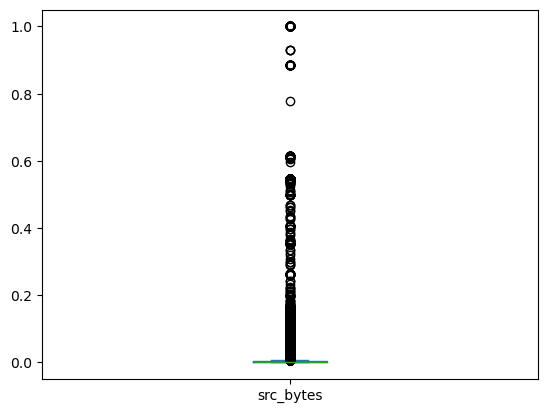

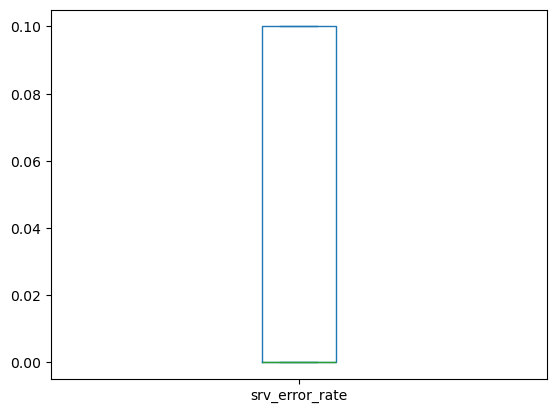

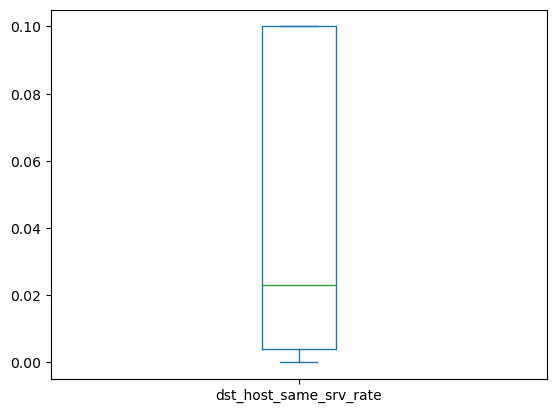

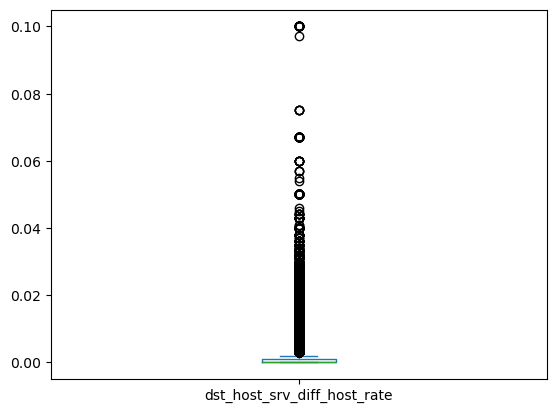

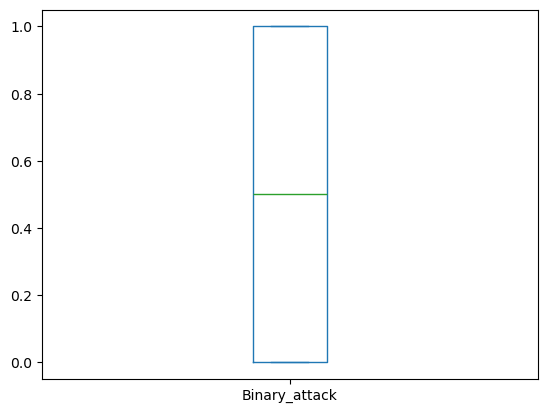

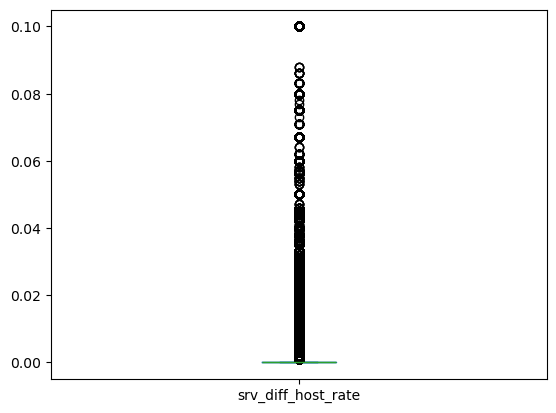

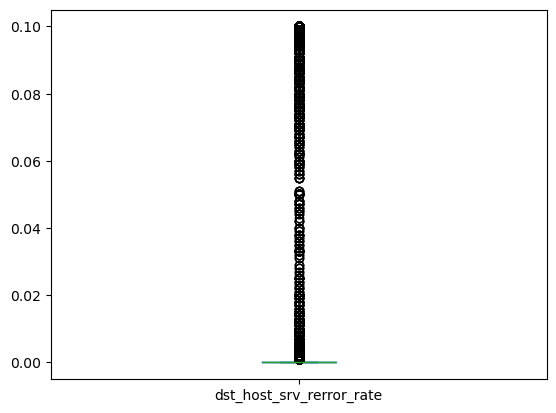

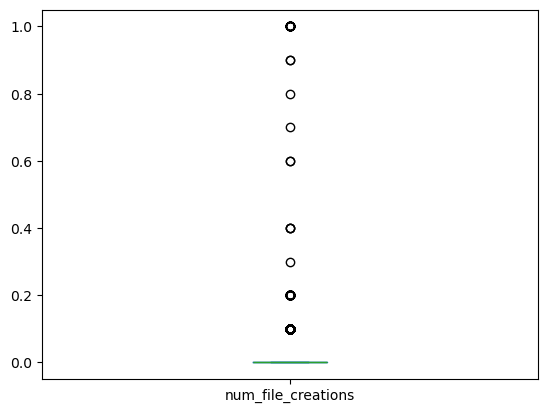

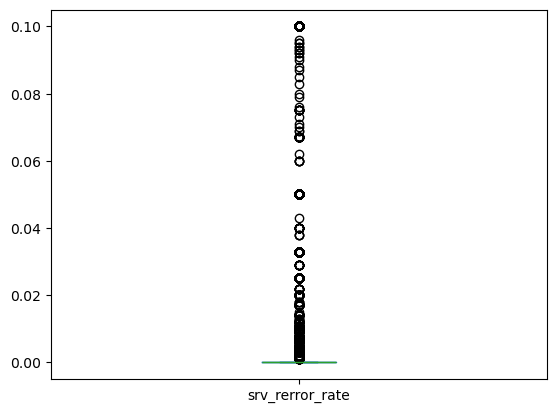

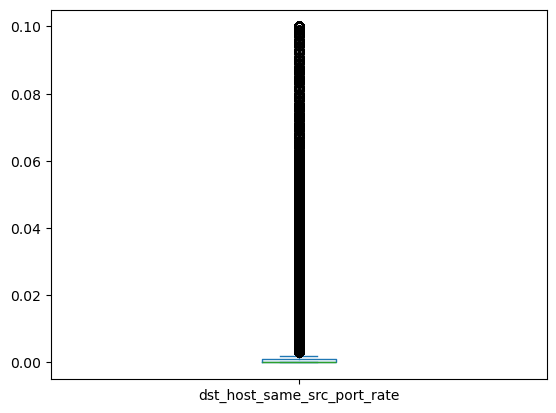

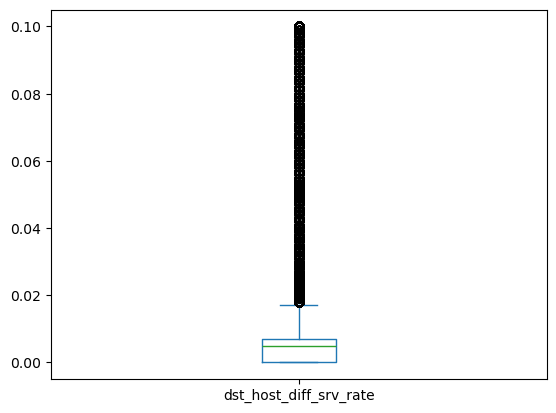

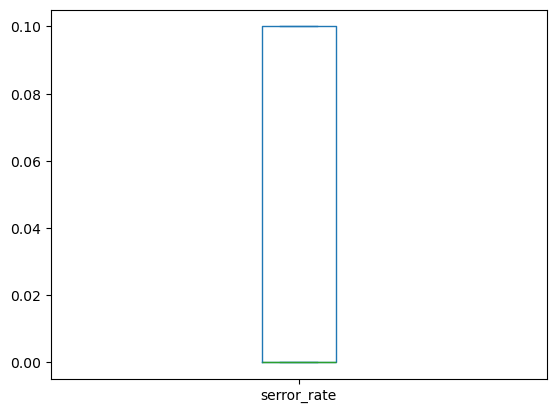

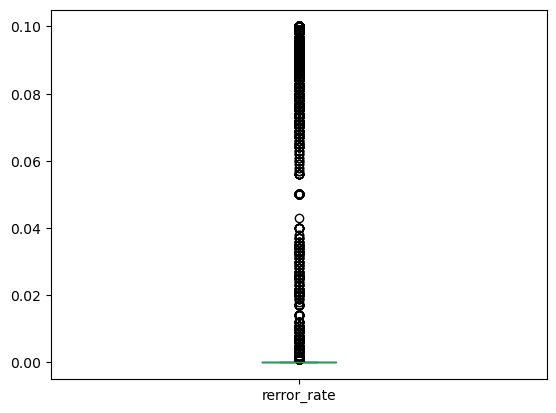

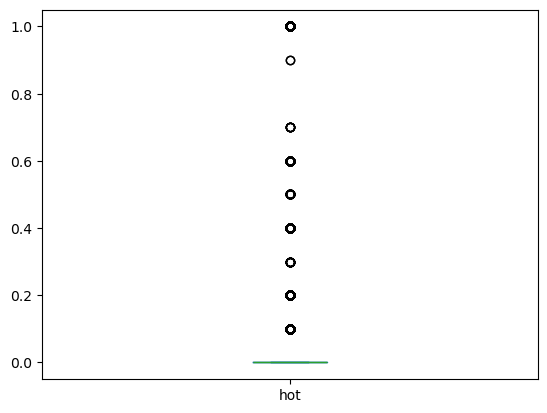

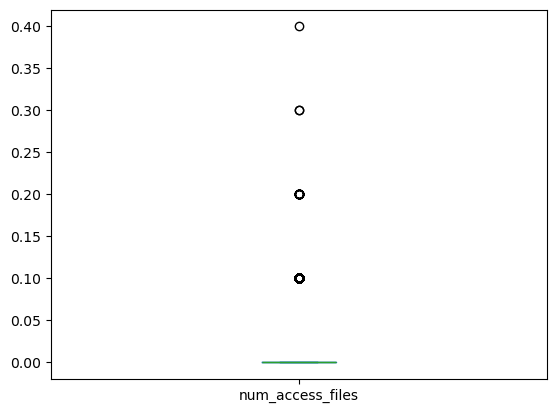

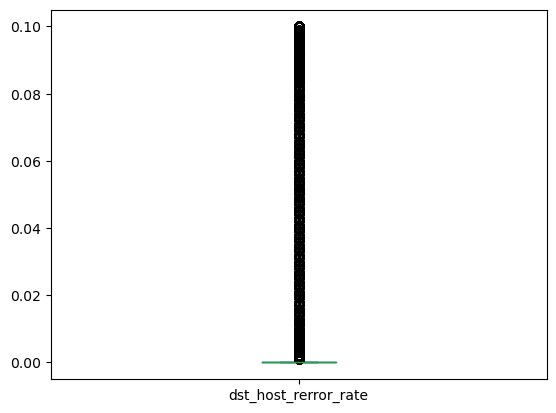

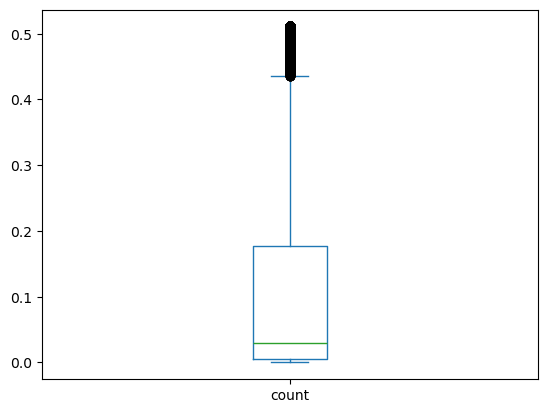

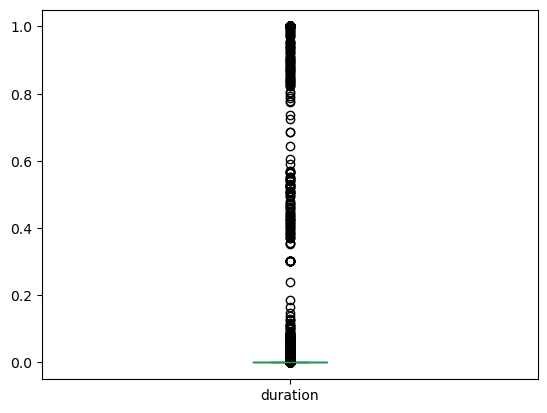

In [228]:
# Identifying outliers through visualization

for col in Numerical_var:
    Balanced_sample[col].plot(kind = 'box')
    plt.show()

# Outliers are visible

In [229]:
# cliping the values with 99%ile - 1%ile 

Balanced_sample = Balanced_sample.apply(lambda x:x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

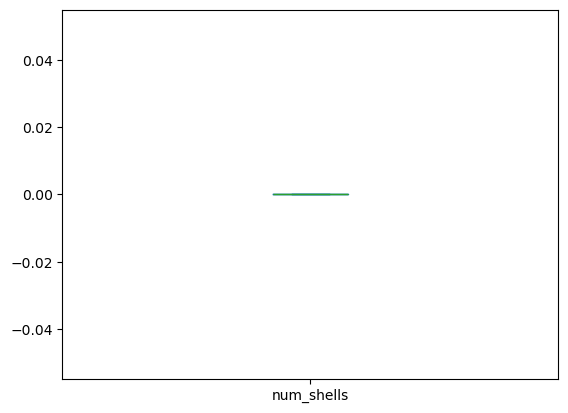

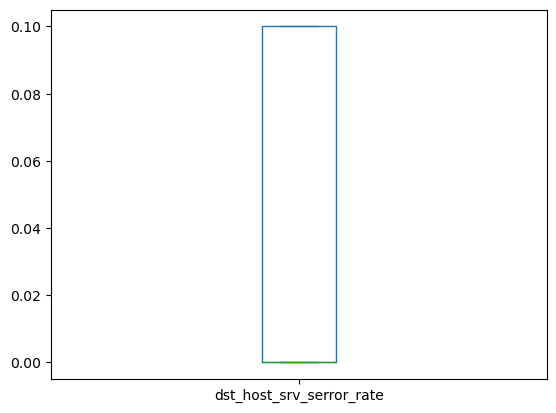

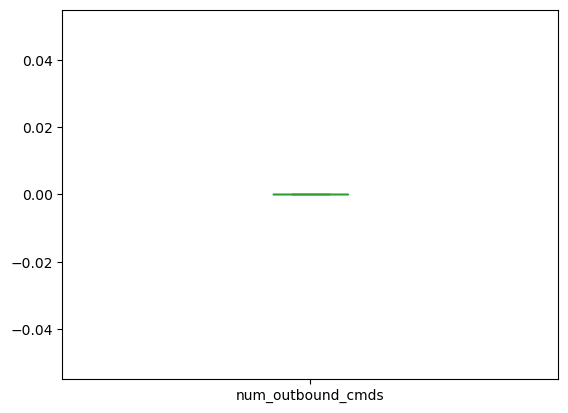

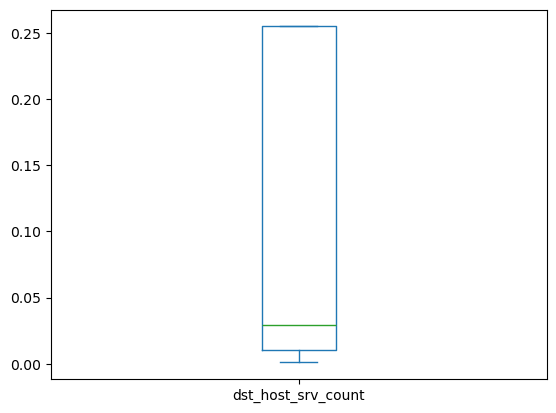

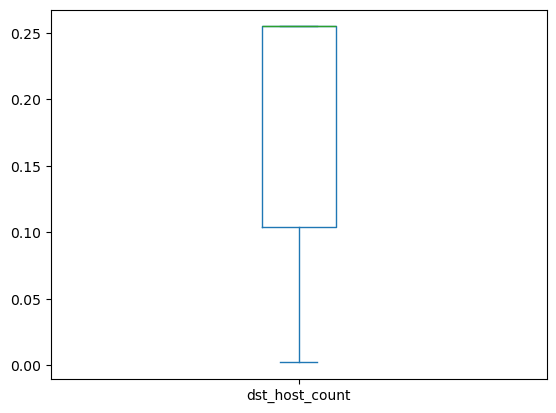

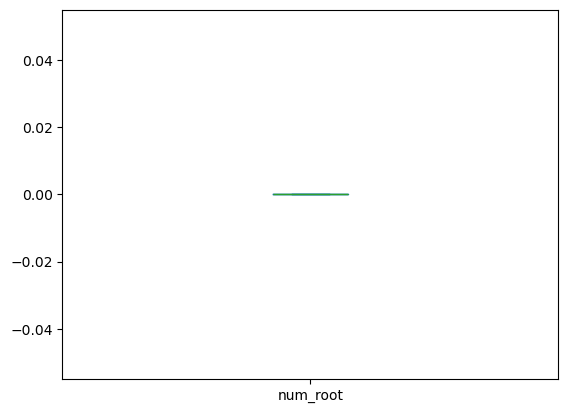

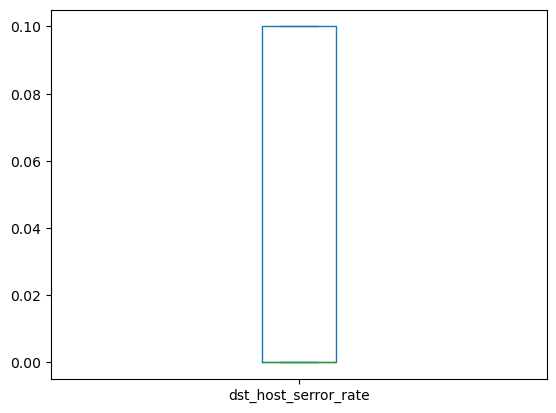

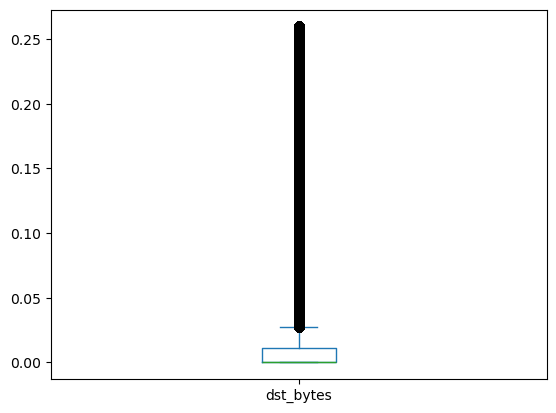

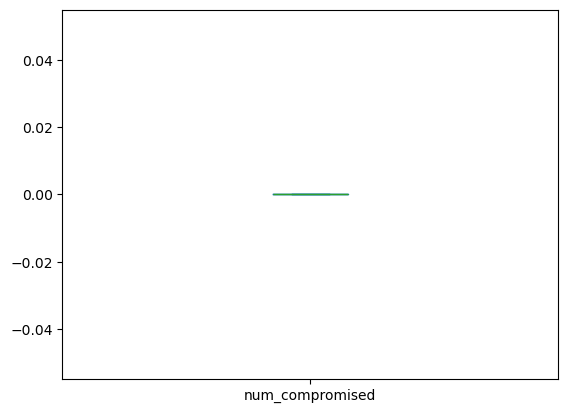

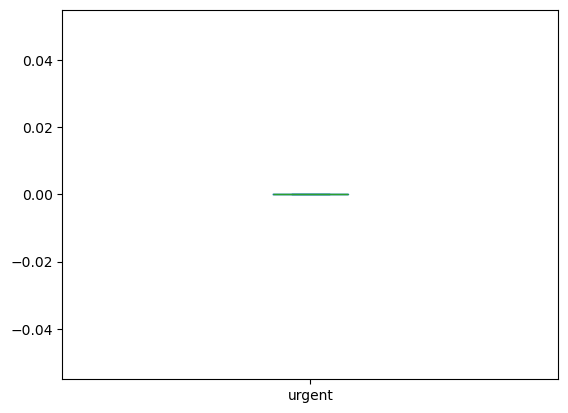

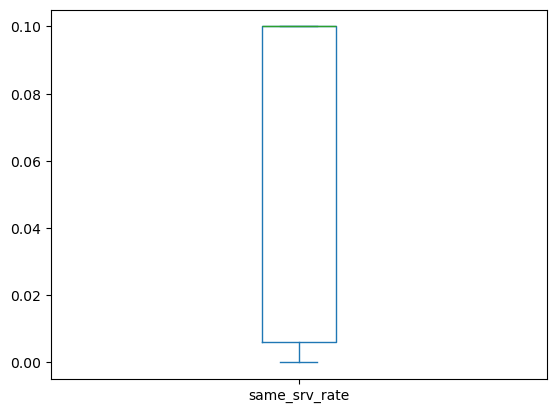

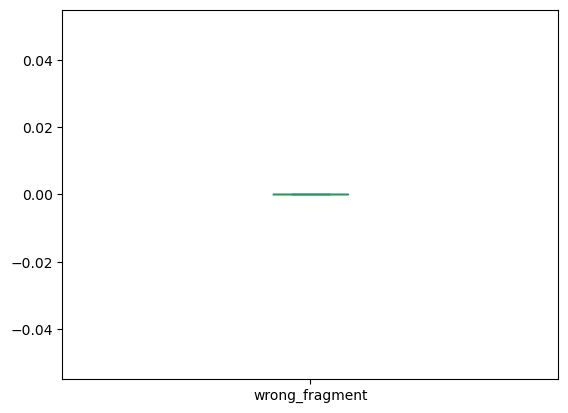

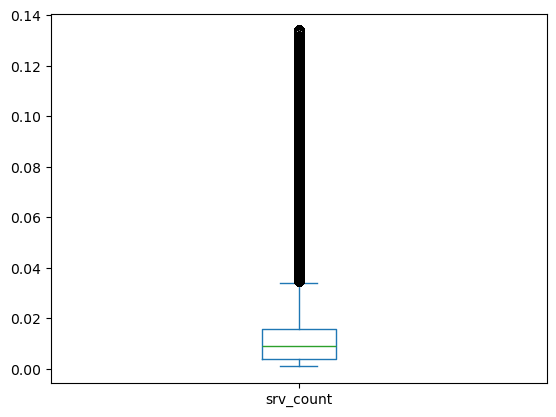

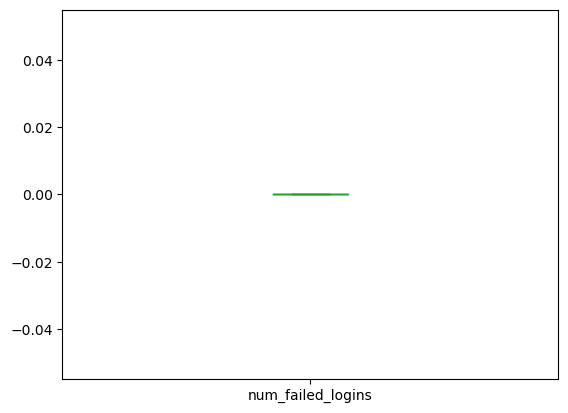

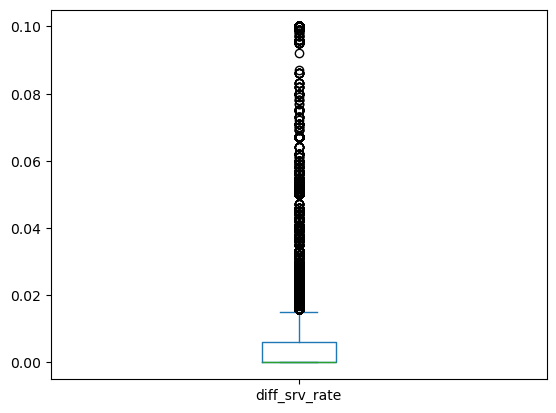

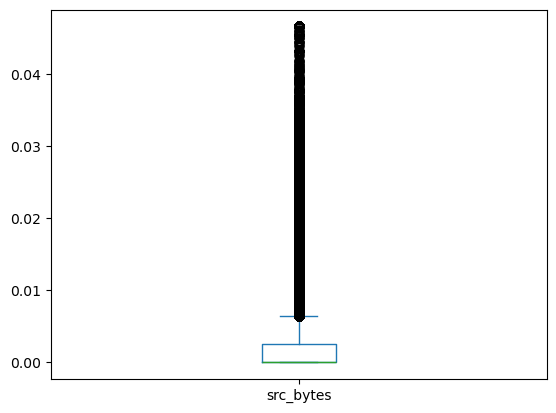

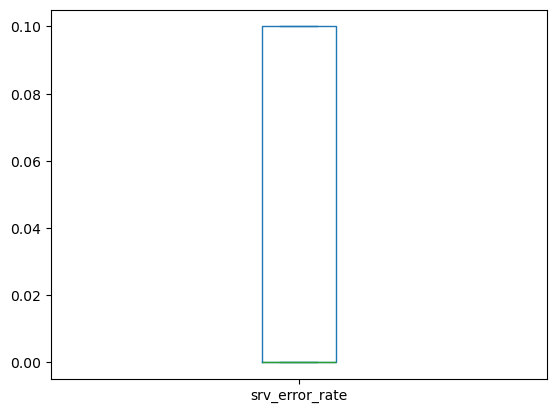

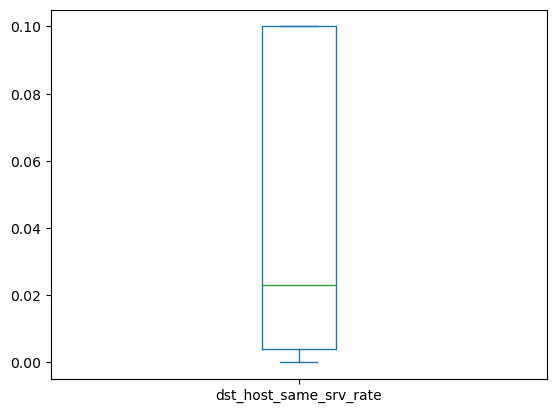

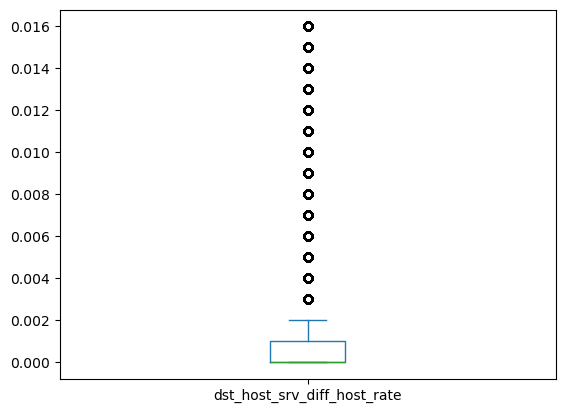

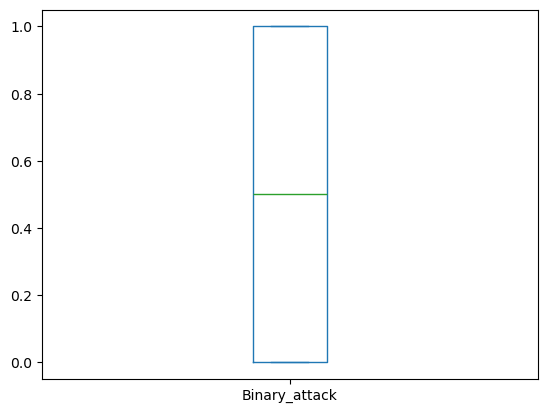

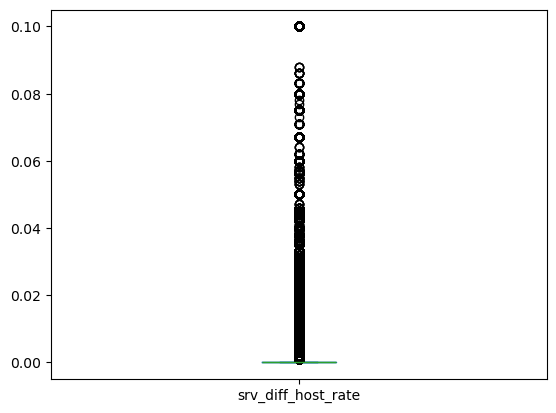

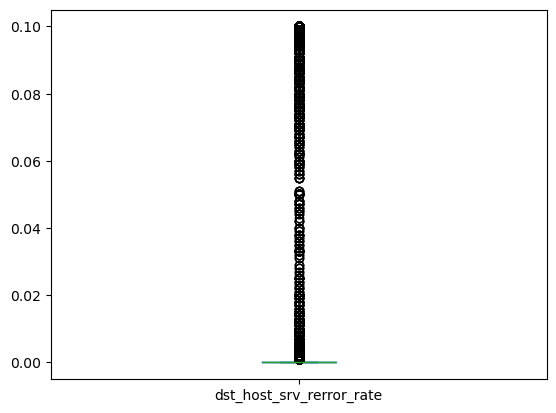

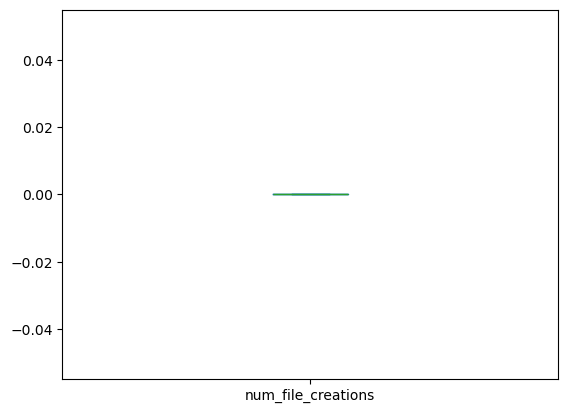

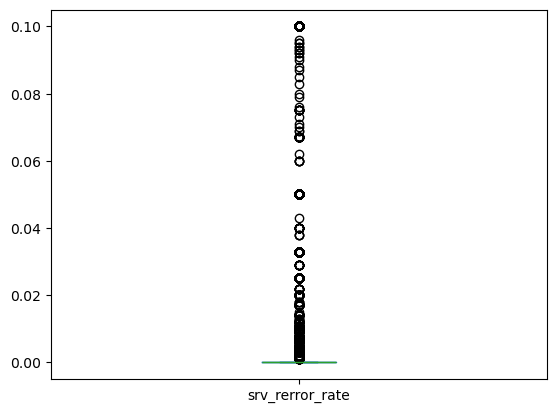

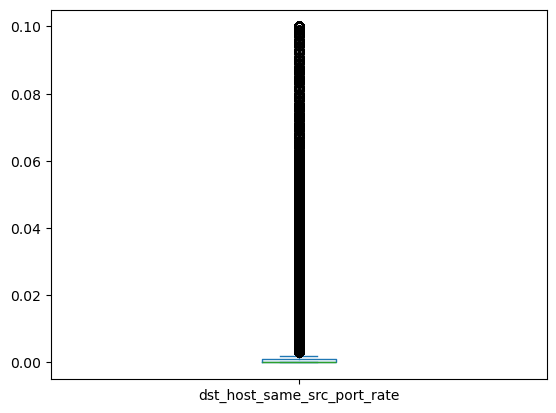

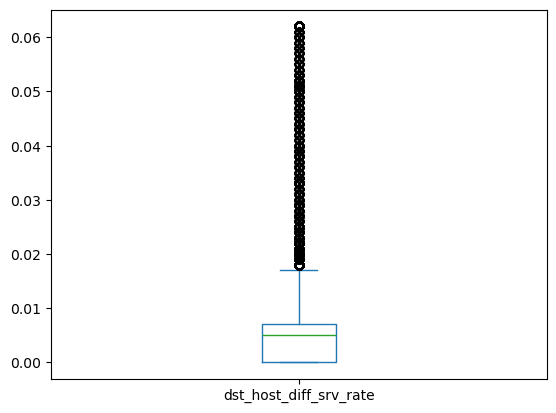

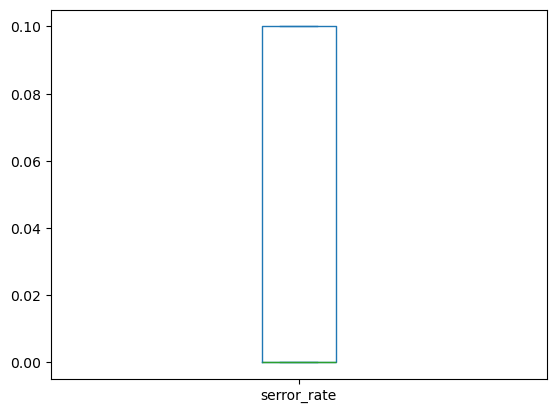

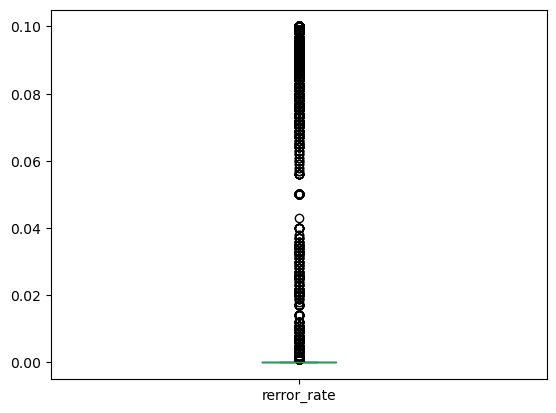

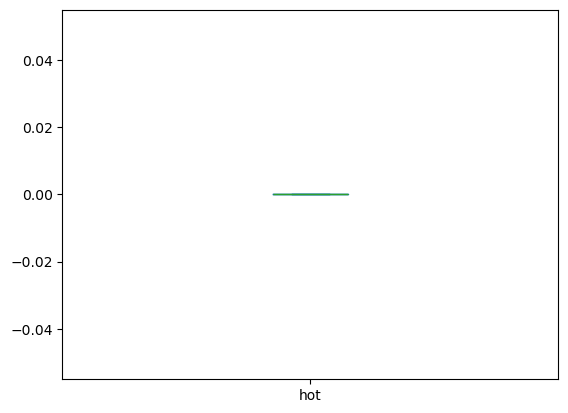

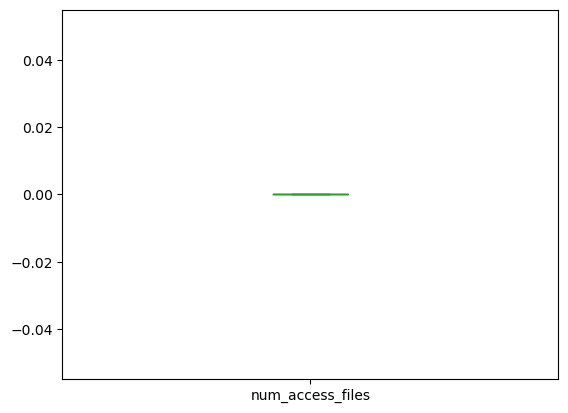

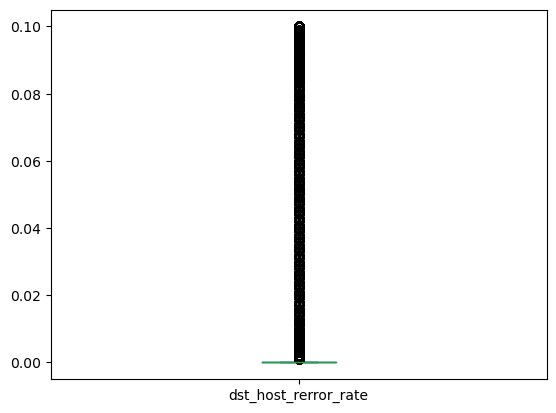

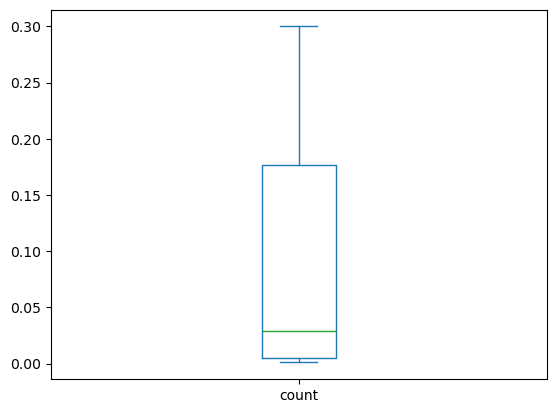

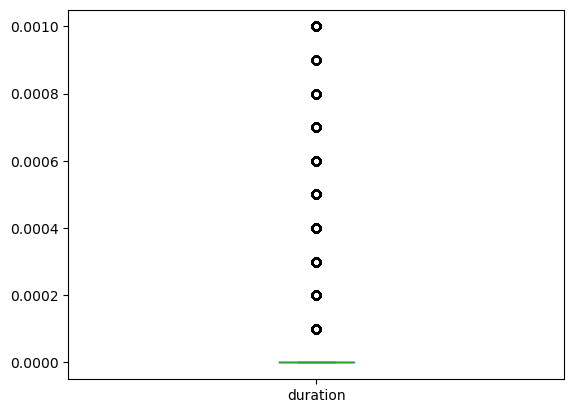

In [230]:
for col in Numerical_var:
    Balanced_sample[col].plot(kind = 'box')
    plt.show()
# Handled the outliers

#### Feature Reduction

In [231]:
columns = []
for col in Balanced_sample.columns:
    if (len(Balanced_sample[col].unique()) ==1):
        columns.append(col)
        print(col,Balanced_sample[col].unique())

print(columns)


land [0]
wrong_fragment [0.]
urgent [0.]
hot [0.]
num_failed_logins [0.]
num_compromised [0.]
root_shell [0.]
su_attempted [0.]
num_root [0.]
num_file_creations [0.]
num_shells [0.]
num_access_files [0.]
num_outbound_cmds [0]
is_host_login [0.]
is_guest_login [0.]
['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']


In [232]:
Balanced_sample.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Multi_Attack',
       'Binary_attack'],
      dtype='object')

In [233]:
 Num_col_dropped = ['wrong_fragment', 'num_outbound_cmds','urgent','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_shells','num_access_files']

#### Spliting the data

In [235]:
# importing train-test-split

from sklearn.model_selection import train_test_split

In [236]:
train, test = train_test_split(Balanced_sample, test_size = 0.3, random_state = 4)

In [237]:
Balanced_sample.shape

(289008, 43)

In [238]:
train.shape

(202305, 43)

In [239]:
test.shape

(86703, 43)

#### Binomial Classification

In [240]:
# Checking the linearity of the variables with the output variable.

Numerical_var

['num_shells',
 'dst_host_srv_serror_rate',
 'num_outbound_cmds',
 'dst_host_srv_count',
 'dst_host_count',
 'num_root',
 'dst_host_serror_rate',
 'dst_bytes',
 'num_compromised',
 'urgent',
 'same_srv_rate',
 'wrong_fragment',
 'srv_count',
 'num_failed_logins',
 'diff_srv_rate',
 'src_bytes',
 'srv_error_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'Binary_attack',
 'srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'num_file_creations',
 'srv_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'serror_rate',
 'rerror_rate',
 'hot',
 'num_access_files',
 'dst_host_rerror_rate',
 'count',
 'duration']

In [241]:
Numerical_col = set(Numerical_var).difference(set(Num_col_dropped))
Numerical_col

{'Binary_attack',
 'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate'}

In [242]:
# Taking a sample data out of the final sample containing only the continuous/numerical variables so that we can perform the correlations and variable reduction techniques.

sample_data = train.loc[:,list(Numerical_col)]

In [243]:
sample_data = sample_data.drop(columns = 'Binary_attack')

In [244]:
sample_data.columns

Index(['dst_host_srv_serror_rate', 'dst_host_srv_count', 'dst_host_count',
       'dst_host_serror_rate', 'dst_bytes', 'same_srv_rate', 'srv_count',
       'diff_srv_rate', 'src_bytes', 'srv_error_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate',
       'srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_diff_srv_rate', 'serror_rate',
       'rerror_rate', 'dst_host_rerror_rate', 'count', 'duration'],
      dtype='object')

#### Bivariate Relationship

<Axes: >

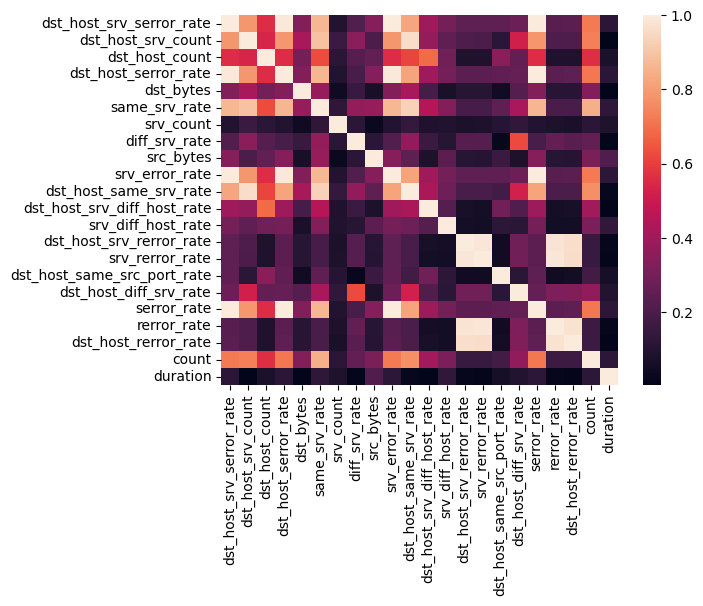

In [245]:
sns.heatmap(sample_data.corr().abs())

In [246]:
Bivariate_relation = pd.DataFrame(sample_data.corrwith(train['Binary_attack']).abs().sort_values(ascending = False))

In [247]:
Bivariate_relation

,0
same_srv_rate,0.956703
dst_host_same_srv_rate,0.927718
dst_host_srv_count,0.898882
dst_host_srv_serror_rate,0.851106
srv_error_rate,0.850365
dst_host_serror_rate,0.850223
serror_rate,0.849779
count,0.819495
dst_host_count,0.631832
dst_host_diff_srv_rate,0.461861


In [248]:
imp_vars_BR = Bivariate_relation.sort_values(by = 0,ascending = False).reset_index()

In [249]:
imp_vars_BR

,index,0
0,same_srv_rate,0.956703
1,dst_host_same_srv_rate,0.927718
2,dst_host_srv_count,0.898882
3,dst_host_srv_serror_rate,0.851106
4,srv_error_rate,0.850365
5,dst_host_serror_rate,0.850223
6,serror_rate,0.849779
7,count,0.819495
8,dst_host_count,0.631832
9,dst_host_diff_srv_rate,0.461861


In [250]:
imp_vars_Bivariate = imp_vars_BR['index'].values.tolist()
imp_vars_Bivariate

['same_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'srv_error_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'count',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_bytes',
 'src_bytes',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'srv_rerror_rate',
 'dst_host_same_src_port_rate',
 'duration',
 'srv_count']

#### Univariate Regression for Variable Reduction

In [251]:
# Importing smf

import statsmodels.formula.api as smf
from sklearn import metrics

In [252]:
model = smf.logit('Binary_attack~same_srv_rate', data = train).fit()

Optimization terminated successfully.
         Current function value: 0.086089
         Iterations 10


In [253]:
metrics.roc_auc_score(train.Binary_attack, model.predict())

0.9832440310645171

In [254]:
model = smf.logit('Binary_attack~dst_host_same_src_port_rate', data = train).fit()
metrics.roc_auc_score(train.Binary_attack, model.predict())

Optimization terminated successfully.
         Current function value: 0.683143
         Iterations 6


0.7943256628845631

In [255]:
somerced_val = pd.DataFrame()
for i_var in sample_data.columns:
    print(i_var)
    model = smf.logit('Binary_attack~'+str(i_var), data = train).fit()
    somerce_d = 2*metrics.roc_auc_score(train.Binary_attack, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

dst_host_srv_serror_rate
Optimization terminated successfully.
         Current function value: 0.232896
         Iterations 13
dst_host_srv_count
Optimization terminated successfully.
         Current function value: 0.159169
         Iterations 9
dst_host_count
Optimization terminated successfully.
         Current function value: 0.433404
         Iterations 8
dst_host_serror_rate
Optimization terminated successfully.
         Current function value: 0.232131
         Iterations 13
dst_bytes
Optimization terminated successfully.
         Current function value: 0.355068
         Iterations 12
same_srv_rate
Optimization terminated successfully.
         Current function value: 0.086089
         Iterations 10
srv_count
Optimization terminated successfully.
         Current function value: 0.692560
         Iterations 4
diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.361599
         Iterations 8
src_bytes
Optimization terminated successfully.
    

In [256]:
somerced_val

,0,1
0,dst_host_srv_serror_rate,0.834107
0,dst_host_srv_count,0.9594
0,dst_host_count,0.662866
0,dst_host_serror_rate,0.849311
0,dst_bytes,0.924305
0,same_srv_rate,0.966488
0,srv_count,-0.100397
0,diff_srv_rate,0.95103
0,src_bytes,0.946623
0,srv_error_rate,0.838537


In [257]:
imp_vars_UR = somerced_val.sort_values(by = 1, ascending = False)

In [258]:
imp_vars_UR 

,0,1
0,dst_host_same_srv_rate,0.968252
0,same_srv_rate,0.966488
0,dst_host_srv_count,0.9594
0,diff_srv_rate,0.95103
0,src_bytes,0.946623
0,count,0.945046
0,dst_bytes,0.924305
0,dst_host_diff_srv_rate,0.903408
0,dst_host_serror_rate,0.849311
0,serror_rate,0.848624


In [259]:
imp_vars_Univariate = imp_vars_UR[0].values.tolist()
imp_vars_Univariate

['dst_host_same_srv_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'diff_srv_rate',
 'src_bytes',
 'count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_error_rate',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'srv_diff_host_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'duration',
 'srv_count']

In [260]:
# Importing SelectKBest

from sklearn.feature_selection import SelectKBest,f_classif

In [261]:
SKB = SelectKBest(f_classif, k=15).fit(train, train['Binary_attack'])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 42] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [262]:
SKB.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True])

In [263]:
imp_vars_kbest = train.columns[SKB.get_support()]
imp_vars_kbest

Index(['service', 'flag', 'logged_in', 'count', 'serror_rate',
       'srv_error_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'Multi_Attack', 'Binary_attack'],
      dtype='object')

In [264]:
# Final columns

temp_vars = set(imp_vars_Univariate).intersection(set(imp_vars_kbest))
temp_vars

{'count',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'serror_rate',
 'srv_error_rate'}

In [265]:
imp_vars_Bivariate

['same_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'srv_error_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'count',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_bytes',
 'src_bytes',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'srv_rerror_rate',
 'dst_host_same_src_port_rate',
 'duration',
 'srv_count']

In [266]:
final_vars = set(temp_vars).intersection(set(imp_vars_Bivariate))
final_vars

{'count',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'serror_rate',
 'srv_error_rate'}

In [267]:
final_sample = train[['count','diff_srv_rate','dst_bytes','dst_host_count','dst_host_diff_srv_rate','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_serror_rate','same_srv_rate','serror_rate','srv_error_rate','Binary_attack']]

In [268]:
final_sample.head(2)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,same_srv_rate,serror_rate,srv_error_rate,Binary_attack
81155,0.105,0.008,0.0,0.255,0.007,0.003,0.1,0.008,0.1,0.005,0.1,0.1,1
177162,0.252,0.005,0.0,0.255,0.005,0.005,0.1,0.012,0.1,0.005,0.1,0.1,1


In [269]:
# Importing Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [270]:
# check the collinearity by running the Variable Inflation Factor tests 

X = final_sample.drop(columns = 'Binary_attack')

In [271]:
X_new = pd.Series(variance_inflation_factor(X.values,i) for i in range(len(X.columns)))

In [272]:
vif_data = pd.concat([pd.Series(X.columns),X_new], axis = 1)

In [273]:
vif_data.columns = ['features','VIF']

In [274]:
vif_data.sort_values(by = 'VIF', ascending = False)

,features,VIF
11,srv_error_rate,1172.143535
8,dst_host_srv_serror_rate,1122.608334
10,serror_rate,775.401040
6,dst_host_serror_rate,634.565088
5,dst_host_same_srv_rate,52.673804
7,dst_host_srv_count,30.880701
9,same_srv_rate,23.651541
3,dst_host_count,7.100650
0,count,5.129371
4,dst_host_diff_srv_rate,3.097971


In [275]:
X1 = X.drop(columns = ['srv_error_rate','dst_host_srv_serror_rate','serror_rate','dst_host_serror_rate'])

In [276]:
X1.head(2)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate
81155,0.105,0.008,0.0,0.255,0.007,0.003,0.008,0.005
177162,0.252,0.005,0.0,0.255,0.005,0.005,0.012,0.005


In [277]:
X2 = X1.drop(columns = ['dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate'])

In [278]:
X2.head(2)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate
81155,0.105,0.008,0.0,0.255,0.007
177162,0.252,0.005,0.0,0.255,0.005


In [279]:
X_new = pd.Series(variance_inflation_factor(X2.values,i) for i in range(len(X2.columns)))

In [280]:
X_new.head(2)

0    3.01786
1    1.91153
dtype: float64

In [281]:
vif_data = pd.concat([pd.Series(X2.columns),X_new], axis = 1)

In [282]:
vif_data.columns = ['features','VIF']

In [283]:
vif_data.sort_values(by = 'VIF', ascending = False)

,features,VIF
3,dst_host_count,3.103828
0,count,3.017860
4,dst_host_diff_srv_rate,2.414085
1,diff_srv_rate,1.911530
2,dst_bytes,1.107549


#### Model - Logistic Regression

In [284]:

formula = 'Binary_attack~dst_host_count+count+dst_host_diff_srv_rate+diff_srv_rate+dst_bytes'

In [285]:
Logistic_model = smf.logit(formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.106726
         Iterations 10


In [286]:
print(Logistic_model.summary())

                           Logit Regression Results                           
Dep. Variable:          Binary_attack   No. Observations:               202305
Model:                          Logit   Df Residuals:                   202299
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.8460
Time:                        12:08:07   Log-Likelihood:                -21591.
converged:                       True   LL-Null:                   -1.4023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5.9110      0.062    -94.841      0.000      -6.033      -5.789
dst_host_count            12.1309      0.248     48.838      0.000      11.644      12.618
coun

#### Checking the Model Evaluation Metrics

In [287]:
train_prob = Logistic_model.predict(train)

In [288]:
train['predicted_proba'] = train_prob

In [289]:
train_auc = metrics.roc_auc_score(train.Binary_attack,train_prob)
train_gini = (2*train_auc) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)
print("The AUC for the model built on the Train Data is : ", train_auc)

The Gini Index for the model built on the Train Data is :  0.9760032410202157
The AUC for the model built on the Train Data is :  0.9880016205101079


In [290]:
matrix = train[['Binary_attack','predicted_proba']].reset_index()

In [291]:
matrix

,index,Binary_attack,predicted_proba
0,81155,1,0.958798
1,177162,1,0.999895
2,257122,0,0.007709
3,30694,1,0.998530
4,211015,1,0.999979
...,...,...,...
202300,60400,0,0.042948
202301,434712,0,0.008540
202302,350132,0,0.012709
202303,157253,0,0.135433


In [292]:
matrix = matrix.drop(columns = 'index')

In [293]:
matrix['predict_attack'] = pd.Series(np.where(train.predicted_proba> 0.5, 1, 0))
matrix

,Binary_attack,predicted_proba,predict_attack
0,1,0.958798,1
1,1,0.999895,1
2,0,0.007709,0
3,1,0.998530,1
4,1,0.999979,1
...,...,...,...
202300,0,0.042948,0
202301,0,0.008540,0
202302,0,0.012709,0
202303,0,0.135433,0


In [294]:
pd.crosstab(matrix.Binary_attack, matrix.predict_attack, margins = True)

predict_attack,0,1,All
Binary_attack,,,
0,98705,2213,100918
1,2774,98613,101387
All,101479,100826,202305


In [295]:
print(metrics.classification_report(matrix.Binary_attack, matrix.predict_attack))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    100918
           1       0.98      0.97      0.98    101387

    accuracy                           0.98    202305
   macro avg       0.98      0.98      0.98    202305
weighted avg       0.98      0.98      0.98    202305



#### Confusion matrix and Model evaluation metric on test Dataset 

In [296]:
test_prob = Logistic_model.predict(test)
test['predicted_value'] = test_prob
test_auc = metrics.roc_auc_score(test.Binary_attack,test_prob)
test_gini = (2*test_auc) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Test Data is :  0.9763602497559136
The AUC for the model built on the Test Data is :  0.9881801248779568


In [297]:
test_matrix = test[['Binary_attack','predicted_value']].reset_index()

In [298]:
test_matrix

,index,Binary_attack,predicted_value
0,86051,0,0.158600
1,36025,1,0.998686
2,23047,1,0.999970
3,343507,0,0.497875
4,129321,1,0.755105
...,...,...,...
86698,557749,0,0.013953
86699,138331,0,0.000665
86700,124977,1,0.954908
86701,400156,0,0.002079


In [299]:
test_matrix = test_matrix.drop(columns = 'index')

In [300]:
test_matrix

,Binary_attack,predicted_value
0,0,0.158600
1,1,0.998686
2,1,0.999970
3,0,0.497875
4,1,0.755105
...,...,...
86698,0,0.013953
86699,0,0.000665
86700,1,0.954908
86701,0,0.002079


In [301]:
test_matrix['predict_attack'] = pd.Series(np.where(test.predicted_value> 0.5, 1, 0))
test_matrix

,Binary_attack,predicted_value,predict_attack
0,0,0.158600,0
1,1,0.998686,1
2,1,0.999970,1
3,0,0.497875,0
4,1,0.755105,1
...,...,...,...
86698,0,0.013953,0
86699,0,0.000665,0
86700,1,0.954908,1
86701,0,0.002079,0


In [302]:
pd.crosstab(test_matrix.Binary_attack, test_matrix.predict_attack, margins = True)

predict_attack,0,1,All
Binary_attack,,,
0,42613,973,43586
1,1235,41882,43117
All,43848,42855,86703


In [303]:
print(metrics.classification_report(test_matrix.Binary_attack, test_matrix.predict_attack))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     43586
           1       0.98      0.97      0.97     43117

    accuracy                           0.97     86703
   macro avg       0.97      0.97      0.97     86703
weighted avg       0.97      0.97      0.97     86703



In [304]:
# we are getting high accuracy

#### Multinomial Classification

In [358]:
Final_sample.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
742,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.000,0.0,0.001,0.001,0.003,0.003,6,1
924,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.002,0.0,0.002,0.002,0.002,0.002,6,1


In [359]:
Binary_var

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_host_login',
 'is_guest_login']

In [360]:
Num_col_dropped

['wrong_fragment',
 'num_outbound_cmds',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files']

In [361]:
Num_multi_var = set(Final_sample.columns).difference(set(Nominal_var).union(set(Binary_var)))

In [362]:
Num_multi_var

{'Binary_attack',
 'Multi_Attack',
 'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'hot',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_outbound_cmds',
 'num_root',
 'num_shells',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate',
 'urgent',
 'wrong_fragment'}

In [363]:
Num_multi_var = set(Num_multi_var).difference(set(Num_col_dropped)).difference(['Binary_attack','Multi_Attack'])
Num_multi_var

{'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate'}

In [364]:
sample_multi = Final_sample.copy()

In [365]:
sample_multi.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
742,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.000,0.0,0.001,0.001,0.003,0.003,6,1
924,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.002,0.0,0.002,0.002,0.002,0.002,6,1


In [366]:
sample_multi = sample_multi.drop(columns = 'Binary_attack')

In [367]:
sample_multi.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack
742,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.255,0.1,0.0,0.000,0.0,0.001,0.001,0.003,0.003,6
924,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.057,0.1,0.0,0.002,0.0,0.002,0.002,0.002,0.002,6


In [368]:
sample_multi.Multi_Attack.value_counts()

Multi_Attack
0     346026
1     136337
2       3011
3       1804
4       1778
5        932
6        581
7         32
8         18
9          6
10         5
Name: count, dtype: int64

#### SMOTE 

In [369]:
df_class0 = sample_multi[sample_multi.Multi_Attack == 0]
df_class1 = sample_multi[sample_multi.Multi_Attack == 1]
df_class2 = sample_multi[sample_multi.Multi_Attack == 2]
df_class3 = sample_multi[sample_multi.Multi_Attack == 3]
df_class4 = sample_multi[sample_multi.Multi_Attack == 4]
df_class5 = sample_multi[sample_multi.Multi_Attack == 5]
df_class6 = sample_multi[sample_multi.Multi_Attack == 6]
df_class7 = sample_multi[sample_multi.Multi_Attack == 7]
df_class8 = sample_multi[sample_multi.Multi_Attack == 8]
df_class9 = sample_multi[sample_multi.Multi_Attack == 9]
df_class10 = sample_multi[sample_multi.Multi_Attack == 10]

In [370]:
df_class0 = df_class0.sample(replace = False, n = 1000, random_state = 123)
df_class1 = df_class1.sample(replace = False, n = 1000, random_state = 123)
df_class2 = df_class2.sample(replace = False, n = 1000, random_state = 123)
df_class3 = df_class3.sample(replace = False, n = 1000, random_state = 123)
df_class4 = df_class4.sample(replace = False, n = 1000, random_state = 123)

In [371]:
df_class5 = df_class5.sample(replace = True, n = 1000, random_state = 123)
df_class6 = df_class6.sample(replace = True, n = 1000, random_state = 123)
df_class7 = df_class7.sample(replace = True, n = 1000, random_state = 123)
df_class8 = df_class8.sample(replace = True, n = 1000, random_state = 123)
df_class9 = df_class9.sample(replace = True, n = 1000, random_state = 123)
df_class10 = df_class10.sample(replace = True, n = 1000, random_state = 123)

In [372]:
sample_M = pd.concat([df_class0,df_class1,df_class2,df_class3,df_class4,df_class5,df_class6,df_class7,df_class8,df_class9,df_class10],axis = 0)

In [373]:
sample_M

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack
555553,0.0014,0.0,0.00,0.0,0.00143,0.00193,0,0.0,0.0,0.0,...,0.255,0.10,0.0,0.004,0.003,0.000,0.0,0.004,0.000,0
516355,0.0000,0.0,0.00,0.0,0.00331,0.00823,0,0.0,0.0,0.0,...,0.255,0.10,0.0,0.002,0.002,0.000,0.0,0.000,0.001,0
61292,0.0000,0.0,0.00,0.0,0.00195,0.30190,0,0.0,0.0,0.0,...,0.255,0.10,0.0,0.005,0.005,0.000,0.0,0.000,0.000,0
214278,0.0000,0.0,0.00,0.0,0.00270,0.00468,0,0.0,0.0,0.0,...,0.255,0.10,0.0,0.003,0.001,0.000,0.0,0.000,0.000,0
123651,0.0000,0.0,0.00,0.0,0.00328,0.03411,0,0.0,0.0,0.0,...,0.255,0.10,0.0,0.001,0.002,0.001,0.0,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,...,0.085,0.10,0.0,0.100,0.002,0.000,0.0,0.000,0.000,10
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,...,0.001,0.05,0.1,0.050,0.000,0.000,0.0,0.000,0.000,10
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,...,0.004,0.10,0.0,0.100,0.050,0.000,0.0,0.000,0.000,10
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,...,0.004,0.10,0.0,0.100,0.050,0.000,0.0,0.000,0.000,10


In [374]:
sample_M.Multi_Attack.value_counts()

Multi_Attack
0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: count, dtype: int64

#### Spliting the data

In [375]:
features = []
for feature in sample_M.columns:
    if feature != 'Multi_Attack':
        features.append(feature)
X = sample_M[features]
y = sample_M['Multi_Attack']

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [377]:
count = y_train.value_counts()
count

Multi_Attack
8     827
7     817
2     817
3     805
1     802
4     801
5     801
10    797
6     780
9     777
0     776
Name: count, dtype: int64

In [378]:
Num_multi_var

{'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate'}

In [379]:
# Bivariate Relationship

sample_data_M = X_train.loc[:,list(Num_multi_var)]
sample_data_M

,srv_error_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_count,dst_host_count,srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_serror_rate,dst_bytes,count,...,dst_host_diff_srv_rate,serror_rate,rerror_rate,same_srv_rate,dst_host_rerror_rate,srv_count,diff_srv_rate,src_bytes,dst_host_same_srv_rate,duration
5,0.0,0.000,0.0,0.001,0.002,0.000,0.000,0.0,0.02703,0.001,...,0.100,0.0,0.0,0.100,0.000,0.001,0.000,0.00157,0.050,0.0067
1607,0.0,0.000,0.0,0.001,0.255,0.000,0.100,0.0,0.00000,0.001,...,0.030,0.0,0.1,0.100,0.059,0.001,0.000,0.00000,0.000,0.0000
14,0.0,0.100,0.0,0.002,0.001,0.000,0.000,0.0,0.03939,0.001,...,0.000,0.0,0.0,0.100,0.000,0.001,0.000,0.02402,0.100,0.0049
3,0.0,0.002,0.0,0.085,0.002,0.000,0.000,0.0,0.00005,0.001,...,0.000,0.0,0.0,0.100,0.000,0.001,0.000,0.00000,0.100,0.0000
80962,0.1,0.000,0.1,0.002,0.255,0.000,0.000,0.1,0.00000,0.101,...,0.006,0.1,0.0,0.006,0.000,0.006,0.006,0.00000,0.001,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389325,0.0,0.000,0.0,0.242,0.255,0.000,0.004,0.0,0.00268,0.010,...,0.002,0.0,0.0,0.100,0.004,0.010,0.000,0.00243,0.095,0.0000
554570,0.0,0.004,0.0,0.255,0.018,0.014,0.000,0.0,0.56659,0.001,...,0.000,0.0,0.0,0.100,0.000,0.014,0.000,0.00313,0.100,0.0000
29,0.0,0.000,0.0,0.010,0.010,0.000,0.010,0.0,0.03816,0.001,...,0.000,0.0,0.0,0.100,0.010,0.001,0.000,0.02402,0.100,0.0047
453,0.0,0.000,0.0,0.043,0.043,0.000,0.000,0.0,0.08314,0.001,...,0.000,0.0,0.0,0.100,0.000,0.001,0.000,0.54540,0.100,0.0000


<Axes: >

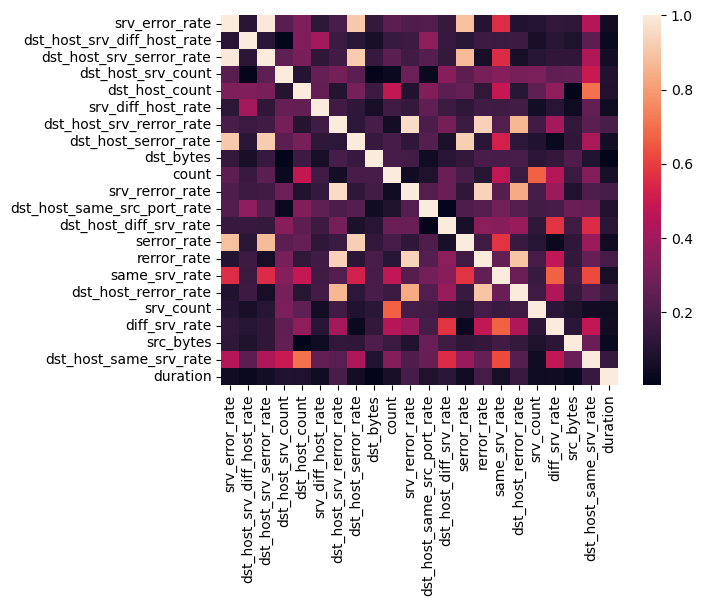

In [380]:
sns.heatmap(sample_data_M.corr().abs())

In [381]:
X_train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
5,0.0067,0.0,0.34,0.00,0.00157,0.02703,0,0.0,0.1,0.0,...,0.002,0.001,0.05,0.10,0.050,0.0,0.0,0.0,0.000,0.0
1607,0.0000,0.0,0.12,0.08,0.00000,0.00000,0,0.0,0.0,0.0,...,0.255,0.001,0.00,0.03,0.059,0.0,0.0,0.0,0.059,0.1


In [382]:
y_train

5         10
1607       4
14         8
3         10
80962      1
          ..
389325     0
554570     0
29         8
453        6
302        5
Name: Multi_Attack, Length: 8800, dtype: int64

In [383]:
Bivariate_relationship = pd.DataFrame(X_train.corrwith(y_train).abs().sort_values(ascending = False))
Bivariate_relationship

C:\Users\user\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\user\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
dst_host_count,0.570754
same_srv_rate,0.472311
count,0.434020
hot,0.407026
dst_host_srv_count,0.365833
dst_host_serror_rate,0.360834
srv_error_rate,0.360260
dst_host_srv_serror_rate,0.353282
num_compromised,0.350639
logged_in,0.332908


In [384]:
imp_vars_BR = Bivariate_relationship.sort_values(by = 0,ascending = False).reset_index()
imp_vars_BR

,index,0
0,dst_host_count,0.570754
1,same_srv_rate,0.472311
2,count,0.434020
3,hot,0.407026
4,dst_host_srv_count,0.365833
5,dst_host_serror_rate,0.360834
6,srv_error_rate,0.360260
7,dst_host_srv_serror_rate,0.353282
8,num_compromised,0.350639
9,logged_in,0.332908


In [385]:
imp_vars_Bivariate = imp_vars_BR['index'].values.tolist()
imp_vars_Bivariate

['dst_host_count',
 'same_srv_rate',
 'count',
 'hot',
 'dst_host_srv_count',
 'dst_host_serror_rate',
 'srv_error_rate',
 'dst_host_srv_serror_rate',
 'num_compromised',
 'logged_in',
 'dst_host_same_srv_rate',
 'urgent',
 'num_access_files',
 'serror_rate',
 'diff_srv_rate',
 'dst_host_same_src_port_rate',
 'num_file_creations',
 'dst_bytes',
 'flag',
 'root_shell',
 'num_root',
 'is_guest_login',
 'srv_count',
 'num_failed_logins',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'src_bytes',
 'service',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'srv_diff_host_rate',
 'srv_rerror_rate',
 'duration',
 'land',
 'wrong_fragment',
 'su_attempted',
 'num_shells',
 'num_outbound_cmds',
 'is_host_login']

#### KBest Feature Reduction

In [386]:
SKB = SelectKBest(f_classif, k=15).fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6  7 14 17 19 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [387]:
SKB.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False,  True,  True])

In [388]:
imp_vars_kbest = X_train.columns[SKB.get_support()]
imp_vars_kbest

Index(['protocol_type', 'flag', 'src_bytes', 'num_failed_logins', 'logged_in',
       'srv_count', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [389]:
# Final Features

final_vars_multi = set(imp_vars_Bivariate).intersection(set(imp_vars_kbest))
final_vars_multi

{'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'flag',
 'logged_in',
 'num_failed_logins',
 'protocol_type',
 'rerror_rate',
 'same_srv_rate',
 'src_bytes',
 'srv_count',
 'srv_rerror_rate'}

In [390]:
X_train = X_train[['dst_host_count','dst_host_rerror_rate','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_rerror_rate','flag','logged_in','num_failed_logins','protocol_type','rerror_rate','same_srv_rate','src_bytes','srv_count','srv_rerror_rate']]

In [391]:
X_train.head(2)

,dst_host_count,dst_host_rerror_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_rerror_rate,flag,logged_in,num_failed_logins,protocol_type,rerror_rate,same_srv_rate,src_bytes,srv_count,srv_rerror_rate
5,0.002,0.000,0.05,0.0,0.001,0.0,0.00,0.1,0.0,0.0,0.0,0.1,0.00157,0.001,0.0
1607,0.255,0.059,0.00,0.0,0.001,0.1,0.08,0.0,0.0,0.0,0.1,0.1,0.00000,0.001,0.1


In [392]:
X_train.columns

Index(['dst_host_count', 'dst_host_rerror_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_rerror_rate', 'flag', 'logged_in', 'num_failed_logins',
       'protocol_type', 'rerror_rate', 'same_srv_rate', 'src_bytes',
       'srv_count', 'srv_rerror_rate'],
      dtype='object')

In [393]:
# check the collinearity by running the Variable Inflation Factor tests 

X_train_multi = pd.Series(variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns)))

In [394]:
vif_data_multi = pd.concat([pd.Series(X_train.columns),X_train_multi], axis = 1)

In [395]:
vif_data_multi

,0,1
0,dst_host_count,7.077814
1,dst_host_rerror_rate,9.389371
2,dst_host_same_srv_rate,13.180265
3,dst_host_serror_rate,7.181414
4,dst_host_srv_count,3.620518
5,dst_host_srv_rerror_rate,26.646780
6,flag,14.723651
7,logged_in,8.291867
8,num_failed_logins,3.549075
9,protocol_type,6.930671


In [396]:
vif_data_multi.columns = ['features','VIF']

In [397]:
vif_data_multi

,features,VIF
0,dst_host_count,7.077814
1,dst_host_rerror_rate,9.389371
2,dst_host_same_srv_rate,13.180265
3,dst_host_serror_rate,7.181414
4,dst_host_srv_count,3.620518
5,dst_host_srv_rerror_rate,26.646780
6,flag,14.723651
7,logged_in,8.291867
8,num_failed_logins,3.549075
9,protocol_type,6.930671


In [398]:
vif_data_multi.sort_values(by = 'VIF', ascending = False)

,features,VIF
14,srv_rerror_rate,27.107869
5,dst_host_srv_rerror_rate,26.646780
10,rerror_rate,23.568672
6,flag,14.723651
2,dst_host_same_srv_rate,13.180265
11,same_srv_rate,12.018012
1,dst_host_rerror_rate,9.389371
7,logged_in,8.291867
3,dst_host_serror_rate,7.181414
0,dst_host_count,7.077814


In [399]:
X_train.columns

Index(['dst_host_count', 'dst_host_rerror_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_rerror_rate', 'flag', 'logged_in', 'num_failed_logins',
       'protocol_type', 'rerror_rate', 'same_srv_rate', 'src_bytes',
       'srv_count', 'srv_rerror_rate'],
      dtype='object')

In [400]:
X_train = X_train.drop(columns = ['srv_rerror_rate','dst_host_srv_rerror_rate','rerror_rate'])

In [401]:
vif_data_multi = pd.concat([pd.Series(X2.columns),X_new], axis = 1)

In [402]:
X_train_multi = pd.Series(variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns)))

In [403]:
vif_data_multi = pd.concat([pd.Series(X_train.columns),X_train_multi], axis = 1)

In [404]:
vif_data_multi.columns = ['features','VIF']

In [405]:
vif_data_multi.sort_values(by = 'VIF', ascending = False)

,features,VIF
2,dst_host_same_srv_rate,12.794667
9,same_srv_rate,10.561925
6,logged_in,7.682685
5,flag,7.138755
0,dst_host_count,6.593045
8,protocol_type,6.476019
1,dst_host_rerror_rate,5.844390
3,dst_host_serror_rate,3.776872
4,dst_host_srv_count,3.576204
7,num_failed_logins,3.220066


In [406]:
X_train = X_train.drop(columns = ['dst_host_same_srv_rate','same_srv_rate'])

In [407]:
X_train = X_train.drop(columns = ['logged_in'])

In [408]:
X_train_multi = pd.Series(variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns)))

In [409]:
vif_data_multi = pd.concat([pd.Series(X_train.columns),X_train_multi], axis = 1)

In [410]:
vif_data_multi.columns = ['features','VIF']

In [411]:
vif_data_multi.sort_values(by = 'VIF', ascending = False)

,features,VIF
4,flag,6.148579
1,dst_host_rerror_rate,5.300776
0,dst_host_count,3.983169
2,dst_host_serror_rate,3.333689
5,num_failed_logins,2.346625
6,protocol_type,2.262668
3,dst_host_srv_count,2.090605
8,srv_count,2.044314
7,src_bytes,1.275097


#### Model - KNN Algorithm

In [414]:
# Importing KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [412]:
X_train = X_train[['flag','dst_host_rerror_rate','dst_host_count','dst_host_serror_rate','num_failed_logins','protocol_type','dst_host_srv_count','srv_count','src_bytes']]

In [415]:
knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

In [416]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [417]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [418]:
predict_train = knn_model.predict(X_train)

In [419]:
predict_train

array([10,  4,  8, ...,  8,  6,  5], dtype=int64)

In [420]:
train_prob = pd.DataFrame(knn_model.predict_proba(X_train))

In [421]:
train_prob

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [422]:
# Confusion Matrix

pd.crosstab(y_train,predict_train, margins = True)

col_0,0,1,2,3,4,5,6,7,8,9,10,All
Multi_Attack,,,,,,,,,,,,
0,742,0,6,2,0,21,0,0,3,0,2,776
1,0,794,0,0,5,3,0,0,0,0,0,802
2,5,0,791,0,20,0,0,0,0,1,0,817
3,1,0,2,802,0,0,0,0,0,0,0,805
4,1,1,22,0,775,1,1,0,0,0,0,801
5,1,0,0,0,0,800,0,0,0,0,0,801
6,0,0,0,0,0,0,780,0,0,0,0,780
7,0,0,0,0,0,0,0,817,0,0,0,817
8,0,0,0,0,0,0,0,0,827,0,0,827


In [423]:
print(metrics.classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       776
           1       1.00      0.99      0.99       802
           2       0.96      0.97      0.97       817
           3       1.00      1.00      1.00       805
           4       0.97      0.97      0.97       801
           5       0.97      1.00      0.98       801
           6       1.00      1.00      1.00       780
           7       1.00      1.00      1.00       817
           8       1.00      1.00      1.00       827
           9       1.00      1.00      1.00       777
          10       1.00      1.00      1.00       797

    accuracy                           0.99      8800
   macro avg       0.99      0.99      0.99      8800
weighted avg       0.99      0.99      0.99      8800



#### Validate the model on the testing Data

In [424]:
X_test = X_test[['flag','dst_host_rerror_rate','dst_host_count','dst_host_serror_rate','num_failed_logins','protocol_type','dst_host_srv_count','srv_count','src_bytes']]

In [425]:
predict_test = knn_model.predict(X_test)

In [426]:
pd.crosstab(y_test,predict_test)

col_0,0,1,2,3,4,5,6,7,8,9,10
Multi_Attack,,,,,,,,,,,
0,208,0,3,4,0,7,0,1,0,0,1
1,0,193,0,0,4,1,0,0,0,0,0
2,2,0,167,0,12,2,0,0,0,0,0
3,1,0,0,194,0,0,0,0,0,0,0
4,0,0,5,0,194,0,0,0,0,0,0
5,0,0,0,0,0,199,0,0,0,0,0
6,0,0,0,0,0,0,220,0,0,0,0
7,0,0,0,0,0,0,0,183,0,0,0
8,0,0,0,0,0,0,0,0,173,0,0


In [427]:
print(metrics.classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       224
           1       1.00      0.97      0.99       198
           2       0.95      0.91      0.93       183
           3       0.98      0.99      0.99       195
           4       0.92      0.97      0.95       199
           5       0.95      1.00      0.98       199
           6       1.00      1.00      1.00       220
           7       0.99      1.00      1.00       183
           8       1.00      1.00      1.00       173
           9       1.00      1.00      1.00       223
          10       1.00      1.00      1.00       203

    accuracy                           0.98      2200
   macro avg       0.98      0.98      0.98      2200
weighted avg       0.98      0.98      0.98      2200



In [428]:
# we are getting almost equal accuracy on train data and test data